In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
data=pd.read_csv(r"C:\Users\ayush\Downloads\CO2 Emissions.csv");data

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [3]:
df=data.select_dtypes(exclude=['object'])
df

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,219
7381,2.0,4,11.2,8.3,9.9,29,232
7382,2.0,4,11.7,8.6,10.3,27,240
7383,2.0,4,11.2,8.3,9.9,29,232


In [4]:
data.nunique()

Make                                  42
Model                               2053
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
Fuel Consumption Comb (mpg)           54
CO2 Emissions(g/km)                  331
dtype: int64

In [5]:
data.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [6]:
data['Model'].unique()

array(['ILX', 'ILX HYBRID', 'MDX 4WD', ...,
       'Tacoma 4WD D-Cab TRD Off-Road/Pro', 'Atlas Cross Sport 4MOTION',
       'XC40 T4 AWD'], dtype=object)

In [7]:
data.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [8]:
print("We have total",len(data['Make'].unique()),"Car Companies Data")
df_brand = data['Make'].value_counts().reset_index().rename(columns={'index':'Make','Make':'Count'})
df_brand.head(20)

We have total 42 Car Companies Data


,Make,Count
0,FORD,628
1,CHEVROLET,588
2,BMW,527
3,MERCEDES-BENZ,419
4,PORSCHE,376
5,TOYOTA,330
6,GMC,328
7,AUDI,286
8,NISSAN,259
9,JEEP,251


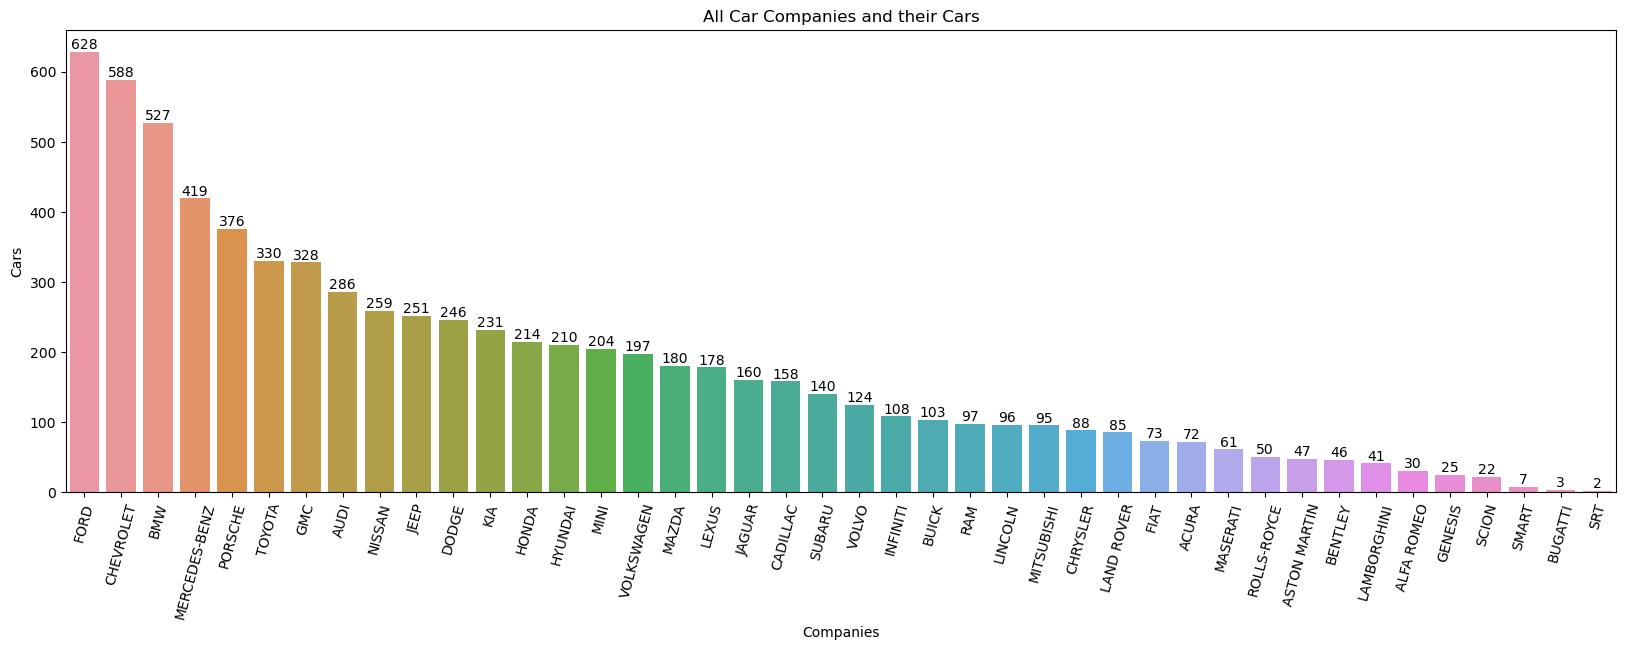

In [9]:
plt.figure(figsize=(20,6))
figure1 = sns.barplot(data=df_brand, x = "Make",  y= "Count")
plt.xticks(rotation = 75)
plt.title("All Car Companies and their Cars")
plt.xlabel("Companies")
plt.ylabel("Cars")
plt.bar_label(figure1.containers[0])
plt.show()

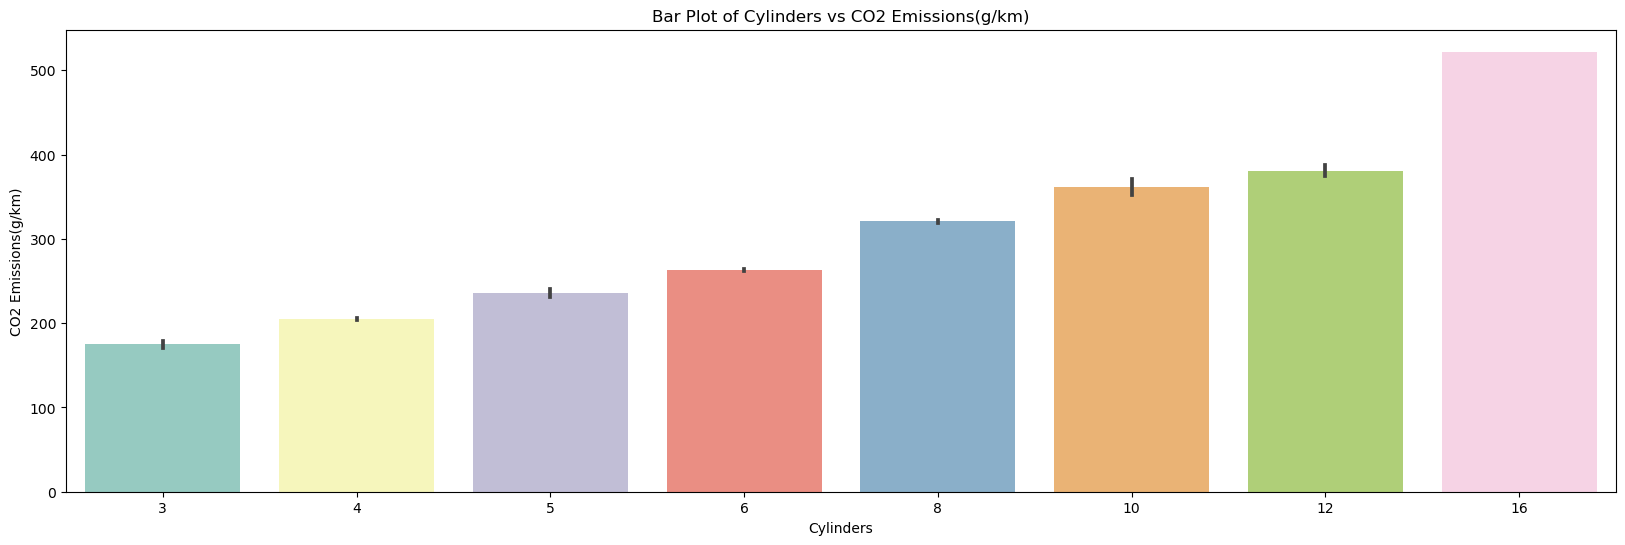

In [10]:
plt.figure(figsize=(20, 6))
sns.barplot(data=data, x='Cylinders', y='CO2 Emissions(g/km)', palette='Set3')
plt.title('Bar Plot of Cylinders vs CO2 Emissions(g/km)')
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emissions(g/km)')
plt.xticks(rotation=0)  
plt.show()

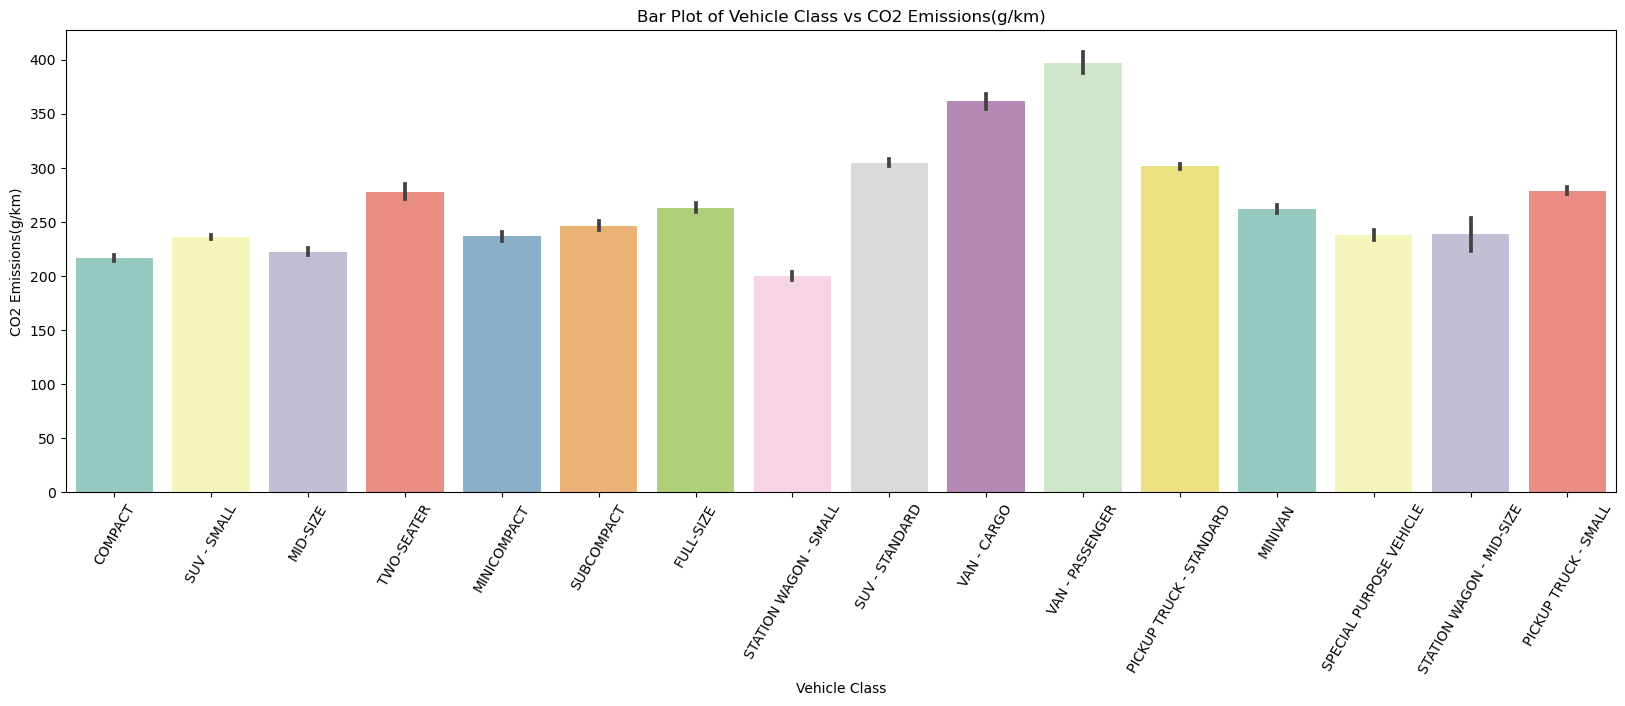

In [11]:
plt.figure(figsize=(20, 6))
sns.barplot(data=data, x='Vehicle Class', y='CO2 Emissions(g/km)', palette='Set3')
plt.title('Bar Plot of Vehicle Class vs CO2 Emissions(g/km)')
plt.xlabel('Vehicle Class')
plt.ylabel('CO2 Emissions(g/km)')
plt.xticks(rotation=60)  # Rotate x-axis labels for better readability
plt.show()

Text(0, 0.5, 'Count')

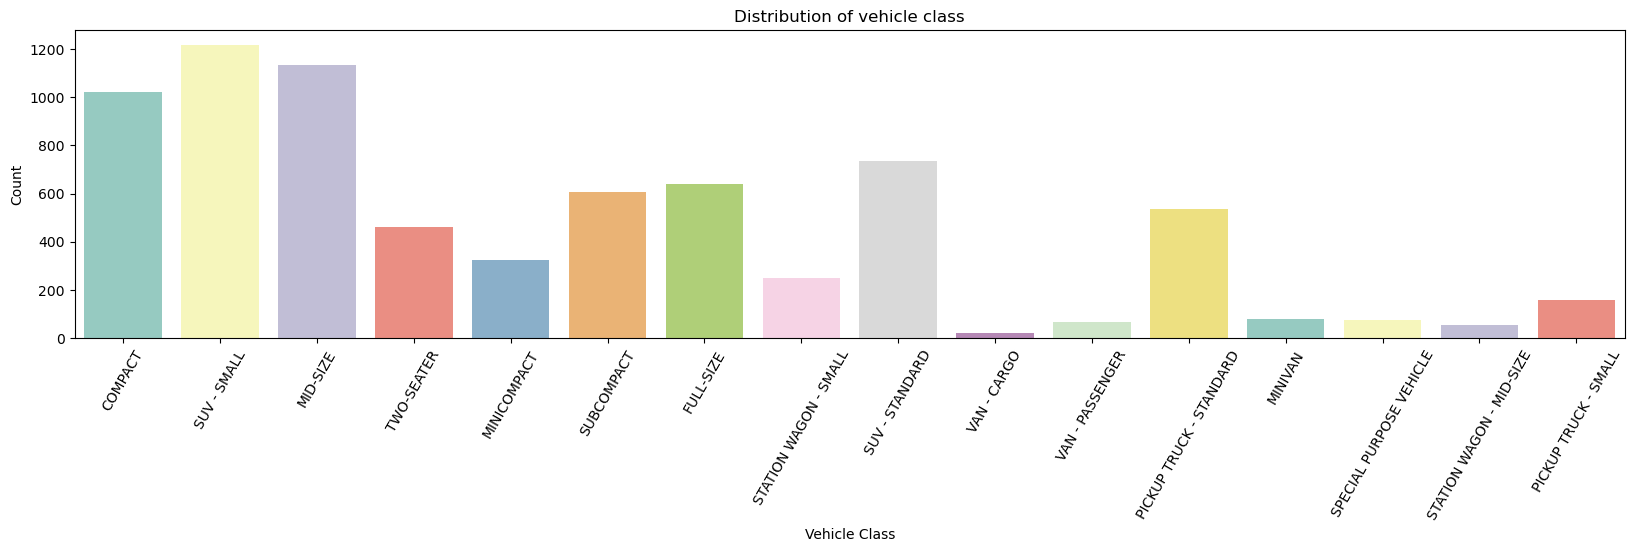

In [12]:
plt.figure(figsize=(20, 4))
sns.countplot(data=data, x=data['Vehicle Class'], palette='Set3')
plt.title(f'Distribution of vehicle class')
plt.xticks(rotation=60)
plt.xlabel('Vehicle Class')
plt.ylabel('Count')

In [13]:
threshold = 8.0  

# Create a new categorical feature 'Fuel Efficiency' based on the threshold
data['Fuel Efficiency'] = data['Fuel Consumption Comb (L/100 km)'].apply(lambda x: 'High' if x <= threshold else 'Low')

In [14]:
data

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Fuel Efficiency
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,Low
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,Low
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,High
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,Low
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,Low
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,Low
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240,Low
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,Low


Text(0.5, 1.0, 'Fuel efficiency vs Fuel Consumption ')

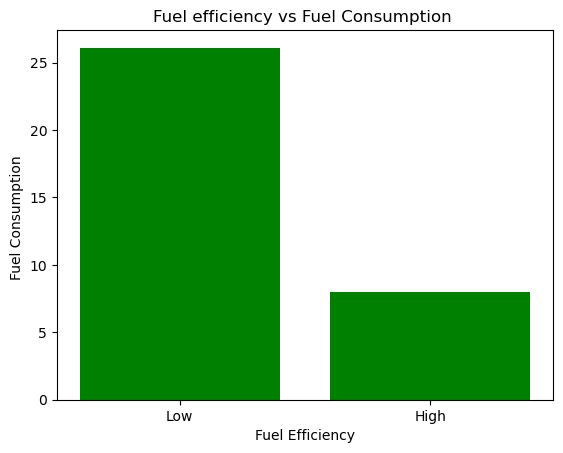

In [15]:
x=data['Fuel Consumption Comb (L/100 km)']
y=data['Fuel Efficiency']
plt.bar(y,x,color='green')
plt.xlabel('Fuel Efficiency')
plt.ylabel('Fuel Consumption ')
plt.title('Fuel efficiency vs Fuel Consumption ')

Text(0.5, 1.0, 'CO2 Emissions(g/km)\xa0vs\xa0Fuel\xa0type')

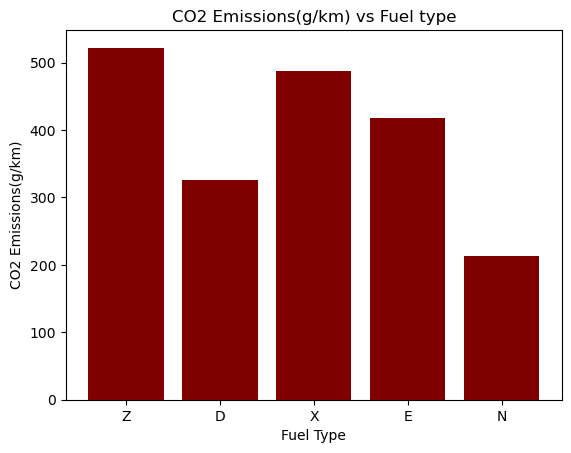

In [16]:
y=data['CO2 Emissions(g/km)']
x=data['Fuel Type']
plt.bar(x,y,color='maroon')
plt.xlabel('Fuel Type')
plt.ylabel('CO2 Emissions(g/km)')
plt.title('CO2 Emissions(g/km) vs Fuel type')

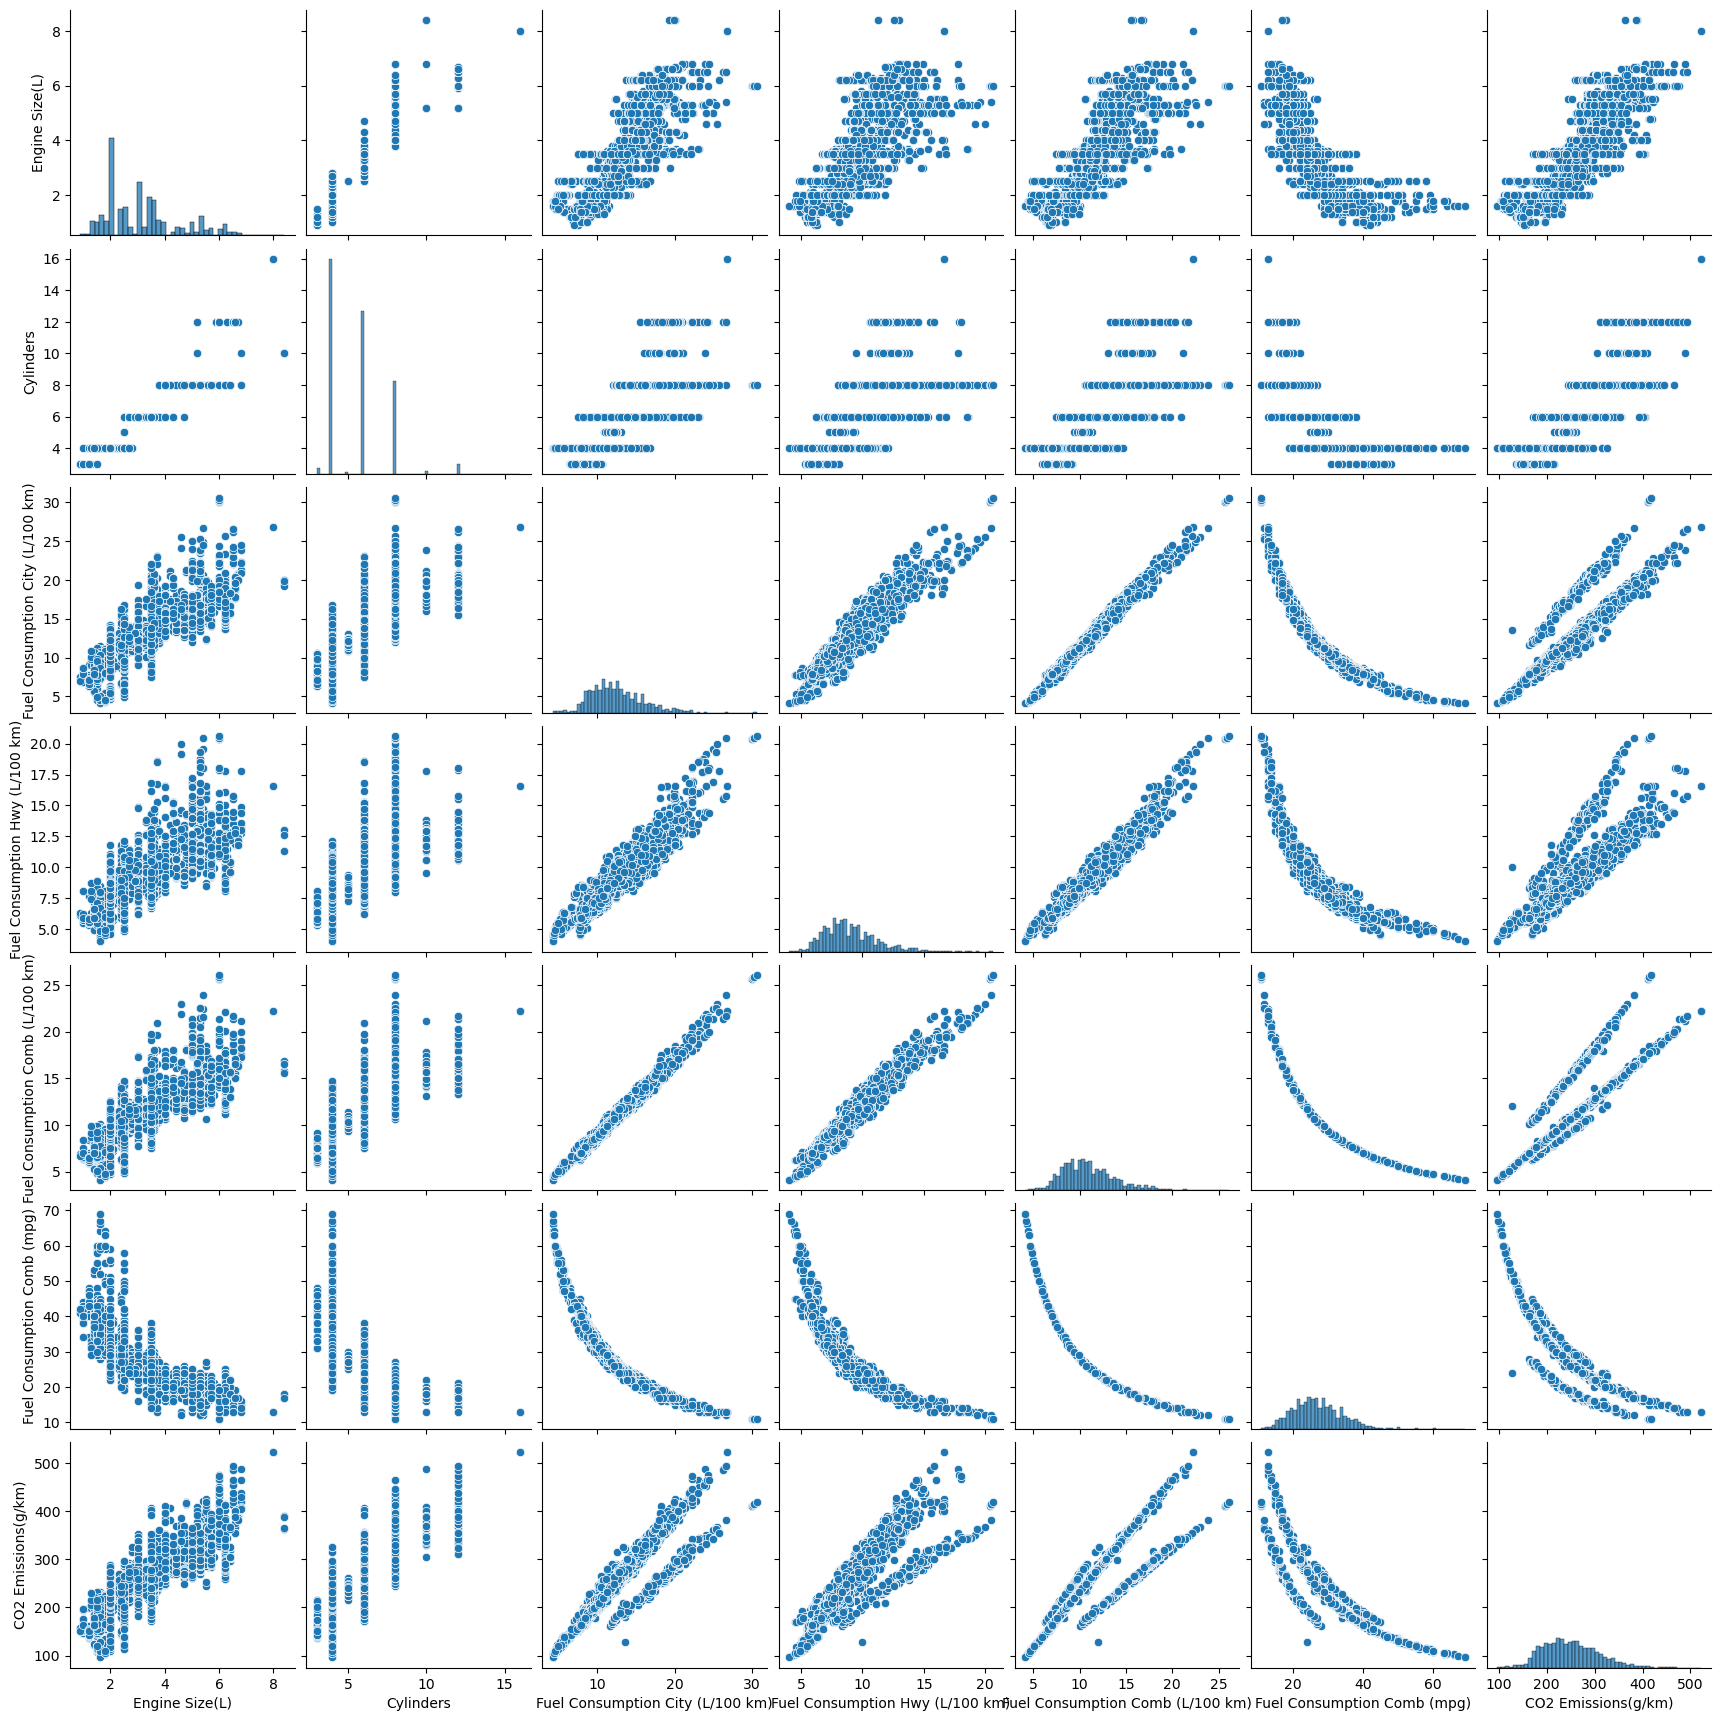

In [17]:
sns.pairplot(data)

In [18]:
numerical_col=['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)','CO2 Emissions(g/km)']

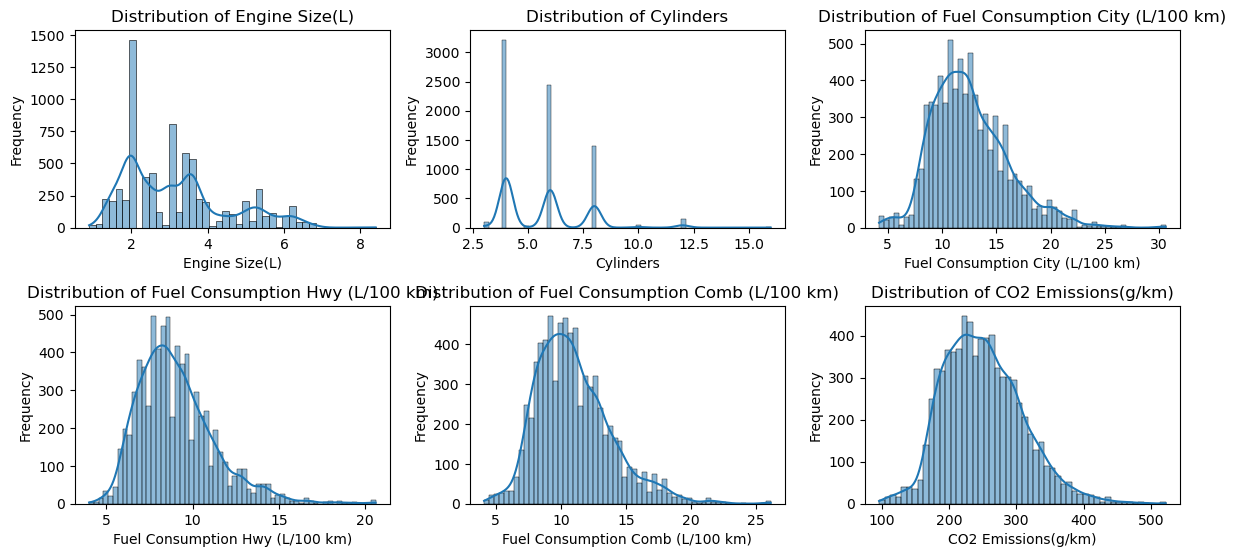

In [19]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_col, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

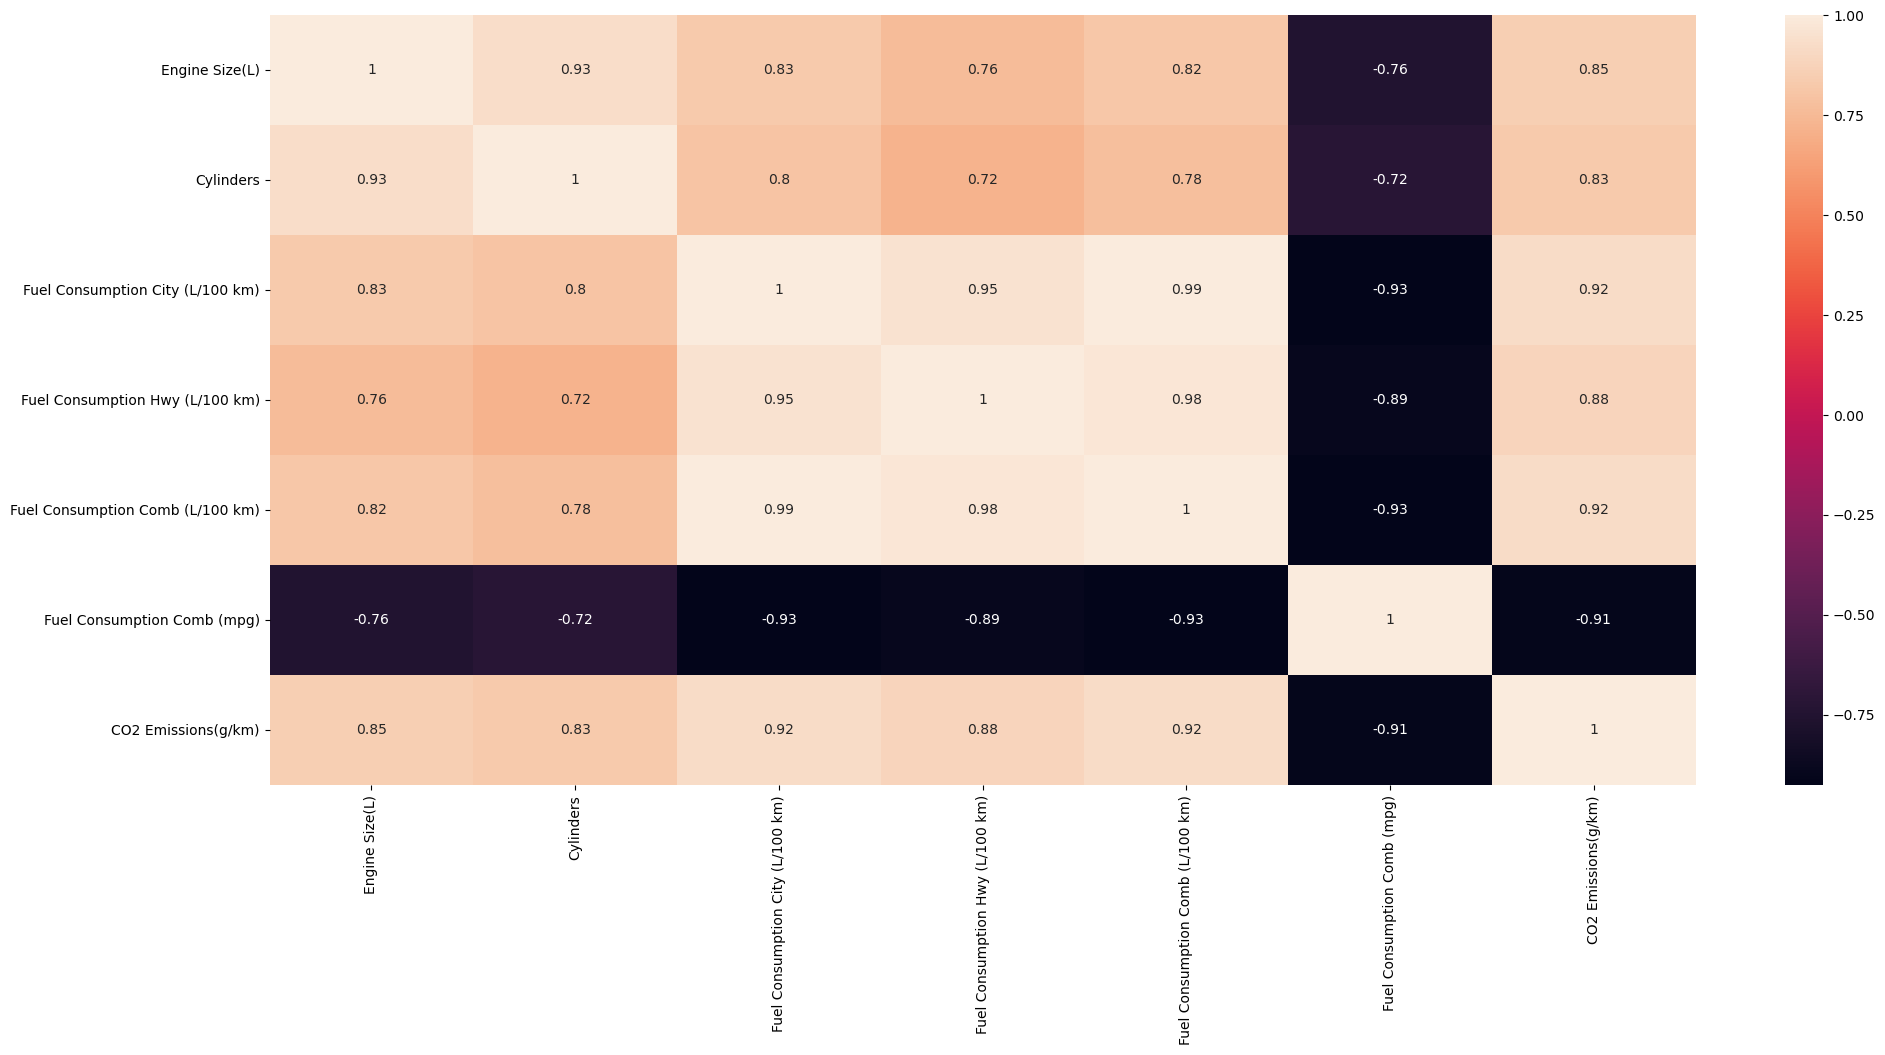

In [20]:
plt.figure(figsize = (23,10))
sns.heatmap(data.corr(), annot = True)
plt.show()

(array([1, 2, 3, 4, 5]),
 [Text(1, 0, 'Engine Size(L)'),
  Text(2, 0, 'Cylinders'),
  Text(3, 0, 'Fuel Consumption City (L/100 km)'),
  Text(4, 0, 'Fuel Consumption Hwy (L/100 km)'),
  Text(5, 0, 'Fuel Consumption Comb (L/100 km)')])

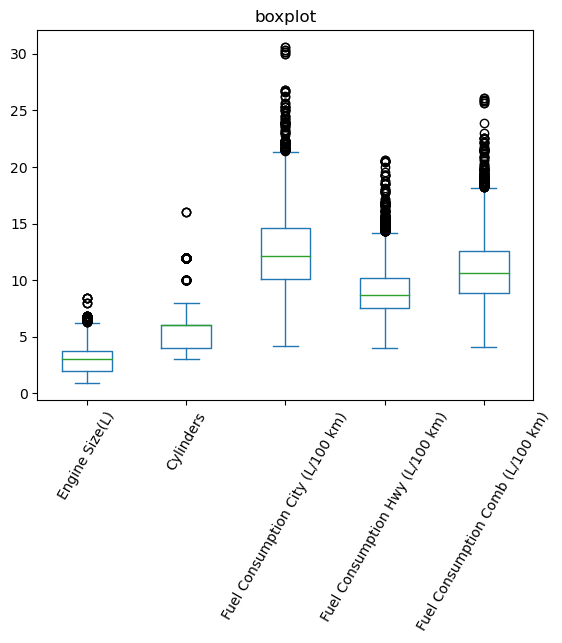

In [21]:
ax = data[['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)']].plot(kind='box', title='boxplot')
plt.xticks(rotation=60)

# Outlier removal

In [22]:
#removing the outliers
from scipy import stats
df_new = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df_new.reset_index(drop=True, inplace=True)

# Factor Analysis

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  statsmodels as smf
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

In [24]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_vars,kmo_model = calculate_kmo(df_new)
print(kmo_model)

0.8090396064357033


In [25]:
from factor_analyzer import FactorAnalyzer

In [26]:
fa = FactorAnalyzer() 

# Fit the dataframe using Factor Analyzer
fa.fit(df_new)

# Identify the eigenvalues
ev, v = fa.get_eigenvalues() #eigenvalues

# display the eigenvalues
ev

array([6.21517454e+00, 4.97312422e-01, 1.17667512e-01, 6.93981345e-02,
       6.29843851e-02, 3.72769833e-02, 1.86021993e-04])

In [27]:
fa = FactorAnalyzer(5, rotation='varimax')
fa.fit(df)
print(fa.loadings_)

[[ 0.46534638  0.84060936  0.10779465  0.0088649  -0.06699185]
 [ 0.40402627  0.86966892  0.11360374 -0.02355352  0.05148704]
 [ 0.83650853  0.51181     0.1243958  -0.13850168  0.00441077]
 [ 0.9045574   0.39972422  0.03958313  0.12515196  0.0118289 ]
 [ 0.86999508  0.47897113  0.09688848 -0.04880878  0.00650295]
 [-0.79477564 -0.41438583 -0.34306229  0.05542048  0.04748834]
 [ 0.69586725  0.58803871  0.33670288  0.04041583  0.05429956]]


In [28]:
lmatrix = pd.DataFrame(fa.loadings_, index = list(df.columns), columns = ['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5'])
lmatrix #loading matrix

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
Engine Size(L),0.465346,0.840609,0.107795,0.008865,-0.066992
Cylinders,0.404026,0.869669,0.113604,-0.023554,0.051487
Fuel Consumption City (L/100 km),0.836509,0.511810,0.124396,-0.138502,0.004411
Fuel Consumption Hwy (L/100 km),0.904557,0.399724,0.039583,0.125152,0.011829
Fuel Consumption Comb (L/100 km),0.869995,0.478971,0.096888,-0.048809,0.006503
Fuel Consumption Comb (mpg),-0.794776,-0.414386,-0.343062,0.055420,0.047488
CO2 Emissions(g/km),0.695867,0.588039,0.336703,0.040416,0.054300


In [29]:
lmatrix.sort_values('Factor 1', ascending=False)

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
Fuel Consumption Hwy (L/100 km),0.904557,0.399724,0.039583,0.125152,0.011829
Fuel Consumption Comb (L/100 km),0.869995,0.478971,0.096888,-0.048809,0.006503
Fuel Consumption City (L/100 km),0.836509,0.511810,0.124396,-0.138502,0.004411
CO2 Emissions(g/km),0.695867,0.588039,0.336703,0.040416,0.054300
Engine Size(L),0.465346,0.840609,0.107795,0.008865,-0.066992
Cylinders,0.404026,0.869669,0.113604,-0.023554,0.051487
Fuel Consumption Comb (mpg),-0.794776,-0.414386,-0.343062,0.055420,0.047488


# Model Building

In [30]:
y=df_new['CO2 Emissions(g/km)']

In [31]:
x=df_new.drop(['CO2 Emissions(g/km)'],axis=1)

In [32]:
from sklearn.linear_model import LinearRegression

# Create a LinearRegression model
model = LinearRegression()

# Fit the model
model.fit(x, y)

# Print the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 5.60458653  6.23706565 -3.36949052  3.97600201  2.73808656 -4.91130908]
Intercept: 308.0638556296592


In [33]:
model.score(x,y)

0.8943180621766156

In [34]:
import statsmodels.formula.api as smf

In [35]:
ml=smf.ols('y~x',data=df_new).fit()

In [36]:
print(ml.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     9929.
Date:                Mon, 06 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:53:10   Log-Likelihood:                -29886.
No. Observations:                7047   AIC:                         5.979e+04
Df Residuals:                    7040   BIC:                         5.983e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    308.0639      6.099     50.511      0.0

# Checking the assumptions of Multiple Regression

In [37]:
residual=ml.resid;residual

0       -2.703085
1       -2.197715
2       11.325259
3      -11.101425
4      -11.341057
          ...    
7042     1.818301
7043     7.837092
7044     5.411184
7045     7.837092
7046     8.691786
Length: 7047, dtype: float64

In [74]:
y_pred=ml.predict(x)
y_pred

0       198.703085
1       223.197715
2       124.674741
3       266.101425
4       255.341057
           ...    
7042    217.181699
7043    224.162908
7044    234.588816
7045    224.162908
7046    239.308214
Length: 7047, dtype: float64

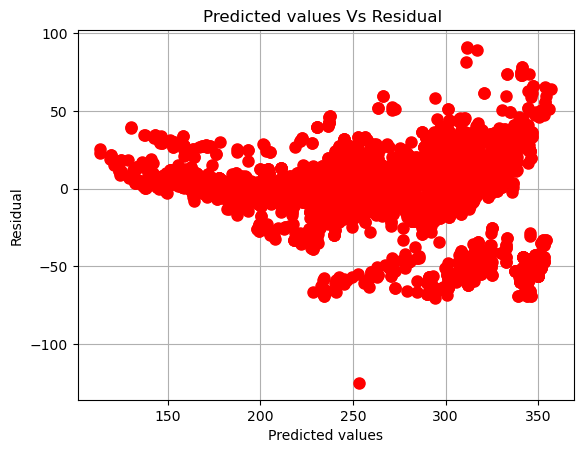

In [77]:
plt.plot(y_pred,residual, 'ro', markersize=8)
plt.xlabel('Predicted values')
plt.ylabel('Residual')
plt.title('Predicted values Vs Residual ')
plt.grid(True)

plt.show()


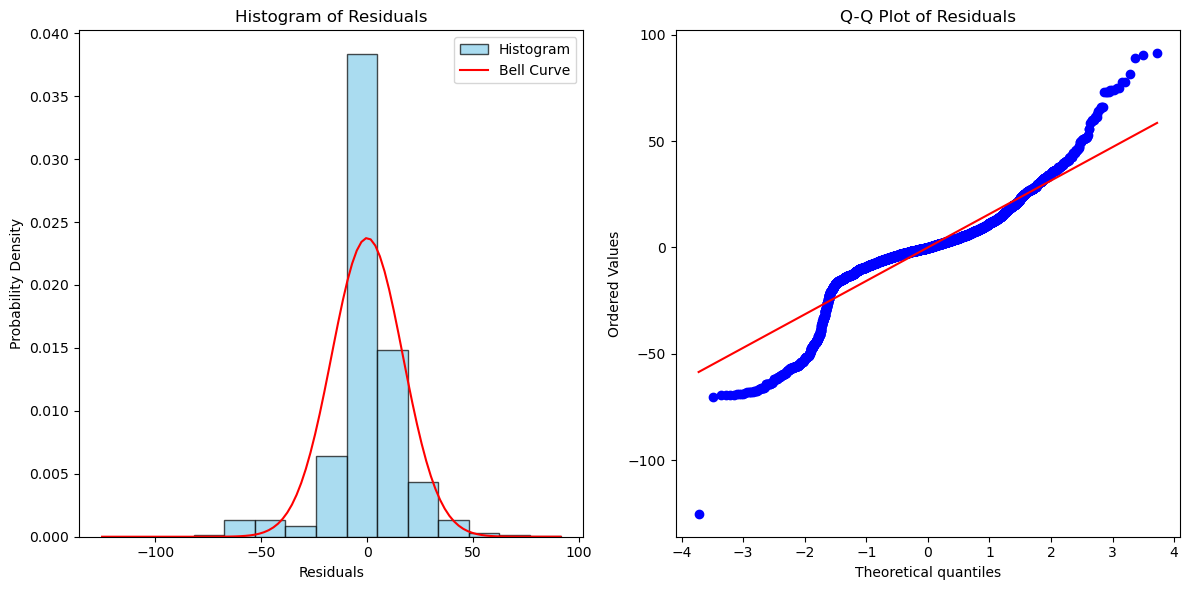

In [81]:
# Visualize the normality assumption with a bell-shaped histogram
plt.figure(figsize=(12, 6))

# Residuals histogram with bell-shaped curve
plt.subplot(1, 2, 1)
plt.hist(residual, bins=15, density=True, edgecolor='k', color='skyblue', alpha=0.7, label='Histogram')
plt.xlabel('Residuals')
plt.ylabel('Probability Density')
plt.title('Histogram of Residuals')
# Add the bell-shaped curve
x_range = np.linspace(min(residual), max(residual), 100)
mean_residuals = np.mean(residual)
std_residuals = np.std(residual)
bell_curve = stats.norm.pdf(x_range, mean_residuals, std_residuals)
plt.plot(x_range, bell_curve, 'r-', label='Bell Curve')
plt.legend()

# Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(residual, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

The histogram provides a visual representation of the distribution of residuals. 
In a normal distribution, the histogram should resemble a bell-shaped curve.
The Q-Q plot compares the distribution of residuals to a theoretical normal distribution. 
If the points in the Q-Q plot follow a straight line, it suggests that the residuals are normally distributed.

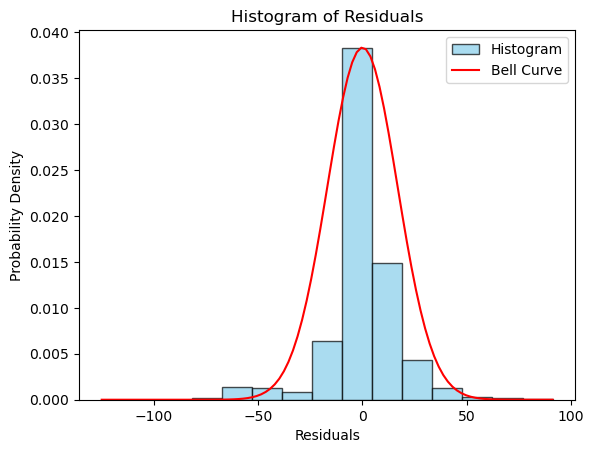

In [83]:
# Residuals histogram with bell-shaped curve

n, bins, patches = plt.hist(residual, bins=15, density=True, edgecolor='k', color='skyblue', alpha=0.7, label='Histogram')
plt.xlabel('Residuals')
plt.ylabel('Probability Density')
plt.title('Histogram of Residuals')
# Add the bell-shaped curve
x_range = np.linspace(min(residual), max(residual), 100)
mean_residuals = np.mean(residual)
std_residuals = np.std(residual)
bell_curve = stats.norm.pdf(x_range, mean_residuals, std_residuals)
scaling_factor = max(n) / max(bell_curve)  # Adjust the scaling factor
plt.plot(x_range, bell_curve * scaling_factor, 'r-', label='Bell Curve')
plt.legend()

# Feature Selection For Model

In [38]:
# Forward selection

In [39]:
import pandas as pd
import statsmodels.api as sm

def forward_selection(df_new, y, significance_level=0.05):
    initial_features = df_new.columns.tolist()
    best_features = []
    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            X = sm.add_constant(df_new[best_features + [new_column]])
            model = sm.OLS(y, X).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if min_p_value < significance_level:
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features


In [40]:
forward_selection(x,y)

['Cylinders',
 'Fuel Consumption Comb (mpg)',
 'Fuel Consumption Hwy (L/100 km)',
 'Engine Size(L)',
 'Fuel Consumption City (L/100 km)']

In [41]:
# Backward elimination

In [42]:
import statsmodels.api as sm

def backward_elimination(df_new, target, significance_level=0.05):
    features = df_new.columns.tolist()
    while len(features) > 0:
        features_with_constant = sm.add_constant(df_new[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if max_p_value >= significance_level:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

In [43]:
backward_elimination(x,y)

['Engine Size(L)',
 'Cylinders',
 'Fuel Consumption City (L/100 km)',
 'Fuel Consumption Hwy (L/100 km)',
 'Fuel Consumption Comb (mpg)']

In [44]:
# Lasso Regression

In [45]:
import pandas as pd
from sklearn.linear_model import Lasso

# Assuming 'X' is your feature matrix and 'y' is the target variable
# X should include 'Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
# 'Fuel Consumption Hwy (L/100 km)', and 'Fuel Consumption Comb (mpg)'

# Create and fit a Lasso regression model
lasso = Lasso(alpha=0.05)  # You can adjust the alpha parameter for regularization
lasso.fit(x, y)

# Get the coefficients of the features
coefficients = lasso.coef_

# Display the coefficients and their corresponding feature names
coefficients_df = pd.DataFrame({'Feature': x.columns, 'Coefficient': coefficients})
print(coefficients_df)


                            Feature  Coefficient
0                    Engine Size(L)     5.483273
1                         Cylinders     6.213025
2  Fuel Consumption City (L/100 km)    -1.648136
3   Fuel Consumption Hwy (L/100 km)     5.026321
4  Fuel Consumption Comb (L/100 km)     0.000000
5       Fuel Consumption Comb (mpg)    -4.887064


# variable to drop=Fuel Consumption Comb (L/100 km)


# Multicollinearity

In [46]:
x1=df_new.drop(['Fuel Consumption Comb (L/100 km)','CO2 Emissions(g/km)'],axis=1)

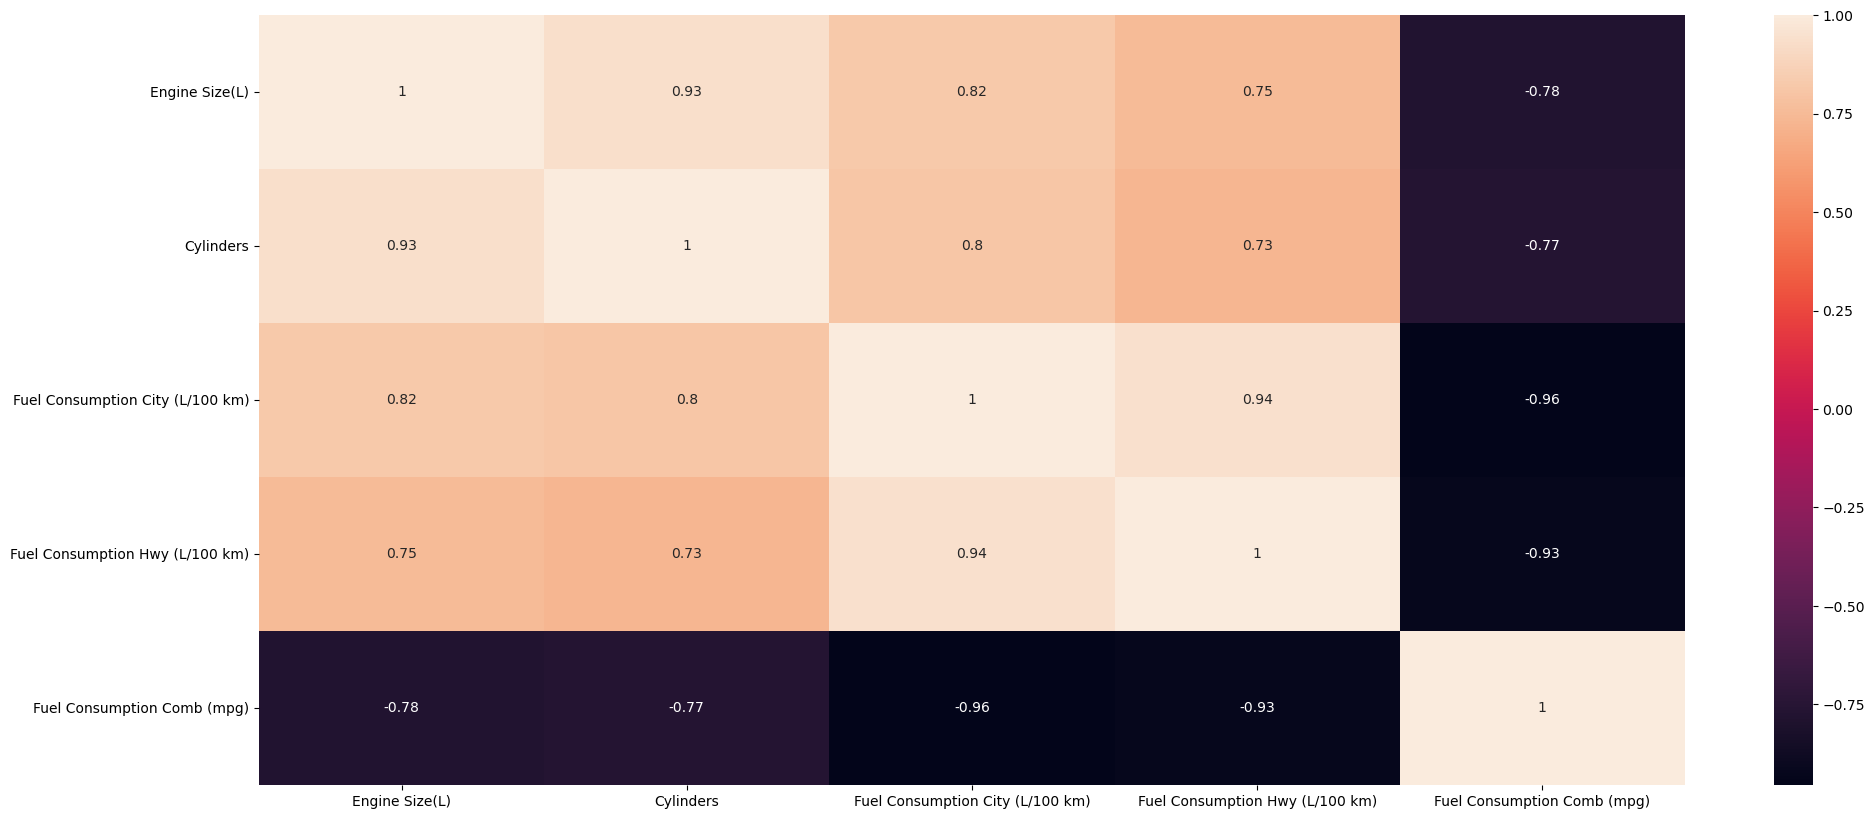

In [47]:
plt.figure(figsize = (23,10))
sns.heatmap(x1.corr(), annot = True)
plt.show()

In [48]:
 # Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif_factors(X):
    vif=[variance_inflation_factor(x1.values,i) for i in range (len(x1.columns))]
    vif_factors=pd.DataFrame()
    vif_factors["column"]=x1.columns
    vif_factors["VIF"]=vif
    return vif_factors

In [49]:
vif_factors=get_vif_factors(x)
vif_factors

,column,VIF
0,Engine Size(L),60.436538
1,Cylinders,106.766737
2,Fuel Consumption City (L/100 km),224.562451
3,Fuel Consumption Hwy (L/100 km),187.415897
4,Fuel Consumption Comb (mpg),8.980692


In [50]:
model_1=smf.ols('y~x1',data=df_new).fit()

In [51]:
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                 1.192e+04
Date:                Mon, 06 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:53:16   Log-Likelihood:                -29886.
No. Observations:                7047   AIC:                         5.978e+04
Df Residuals:                    7041   BIC:                         5.982e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    308.2351      6.092     50.600      0.0

# Residual Analysis

In [52]:
residual=model_1.resid;residual

0       -2.591815
1       -2.268722
2       11.326255
3      -11.054877
4      -11.264763
          ...    
7042     1.953752
7043     7.850183
7044     5.393738
7045     7.850183
7046     8.893100
Length: 7047, dtype: float64

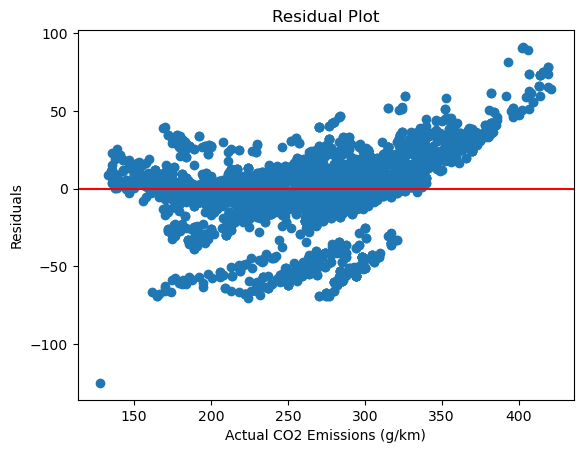

In [53]:
plt.scatter(y, residual)
plt.xlabel('Actual CO2 Emissions (g/km)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# PCA

In [54]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [55]:
scale=StandardScaler()
scale.fit(x1)
scaled_df=scale.transform(x1)

In [56]:
pca=PCA()
pca_values=pca.fit_transform(x1)

In [57]:
pca_values

array([[ 6.62689528, -0.3267617 , -0.15223325, -0.60293884, -0.09847891],
       [ 2.38867629, -1.19283019, -0.3584718 , -0.49087721, -0.38541632],
       [21.26951792,  3.72349331,  2.82609583,  0.58327109,  0.32754733],
       ...,
       [ 0.31328419, -1.98322258, -0.21231368, -0.11711082, -0.02909625],
       [ 2.29355389, -1.40391343,  0.07490165, -0.09678816, -0.03430826],
       [-0.7651614 , -2.21303772, -0.23664466, -0.32573859, -0.02434594]])

In [58]:
ind_var=pd.DataFrame(pca_values)

In [59]:
model_2=smf.ols('y~ind_var',data=df_new).fit()

In [60]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                 1.192e+04
Date:                Mon, 06 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:53:17   Log-Likelihood:                -29886.
No. Observations:                7047   AIC:                         5.978e+04
Df Residuals:                    7041   BIC:                         5.982e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    247.6968      0.200   1236.397      0.0

In [61]:
ind_var

,0,1,2,3,4
0,6.626895,-0.326762,-0.152233,-0.602939,-0.098479
1,2.388676,-1.192830,-0.358472,-0.490877,-0.385416
2,21.269518,3.723493,2.826096,0.583271,0.327547
3,-2.470531,-0.178589,-0.866703,0.138695,-0.032203
4,-0.424730,0.375691,-0.701738,0.149542,-0.044066
...,...,...,...,...,...
7042,3.497862,-1.178655,-0.211349,-0.258423,-0.063197
7043,2.293554,-1.403913,0.074902,-0.096788,-0.034308
7044,0.313284,-1.983223,-0.212314,-0.117111,-0.029096
7045,2.293554,-1.403913,0.074902,-0.096788,-0.034308


In [62]:
x2=ind_var.drop([4],axis=1)
x2

,0,1,2,3
0,6.626895,-0.326762,-0.152233,-0.602939
1,2.388676,-1.192830,-0.358472,-0.490877
2,21.269518,3.723493,2.826096,0.583271
3,-2.470531,-0.178589,-0.866703,0.138695
4,-0.424730,0.375691,-0.701738,0.149542
...,...,...,...,...
7042,3.497862,-1.178655,-0.211349,-0.258423
7043,2.293554,-1.403913,0.074902,-0.096788
7044,0.313284,-1.983223,-0.212314,-0.117111
7045,2.293554,-1.403913,0.074902,-0.096788


# Model After PCA

In [63]:
model_3=smf.ols('y~x2',data=df_new).fit()

In [64]:
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                 1.489e+04
Date:                Mon, 06 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:53:17   Log-Likelihood:                -29887.
No. Observations:                7047   AIC:                         5.978e+04
Df Residuals:                    7042   BIC:                         5.982e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    247.6968      0.200   1236.368      0.0

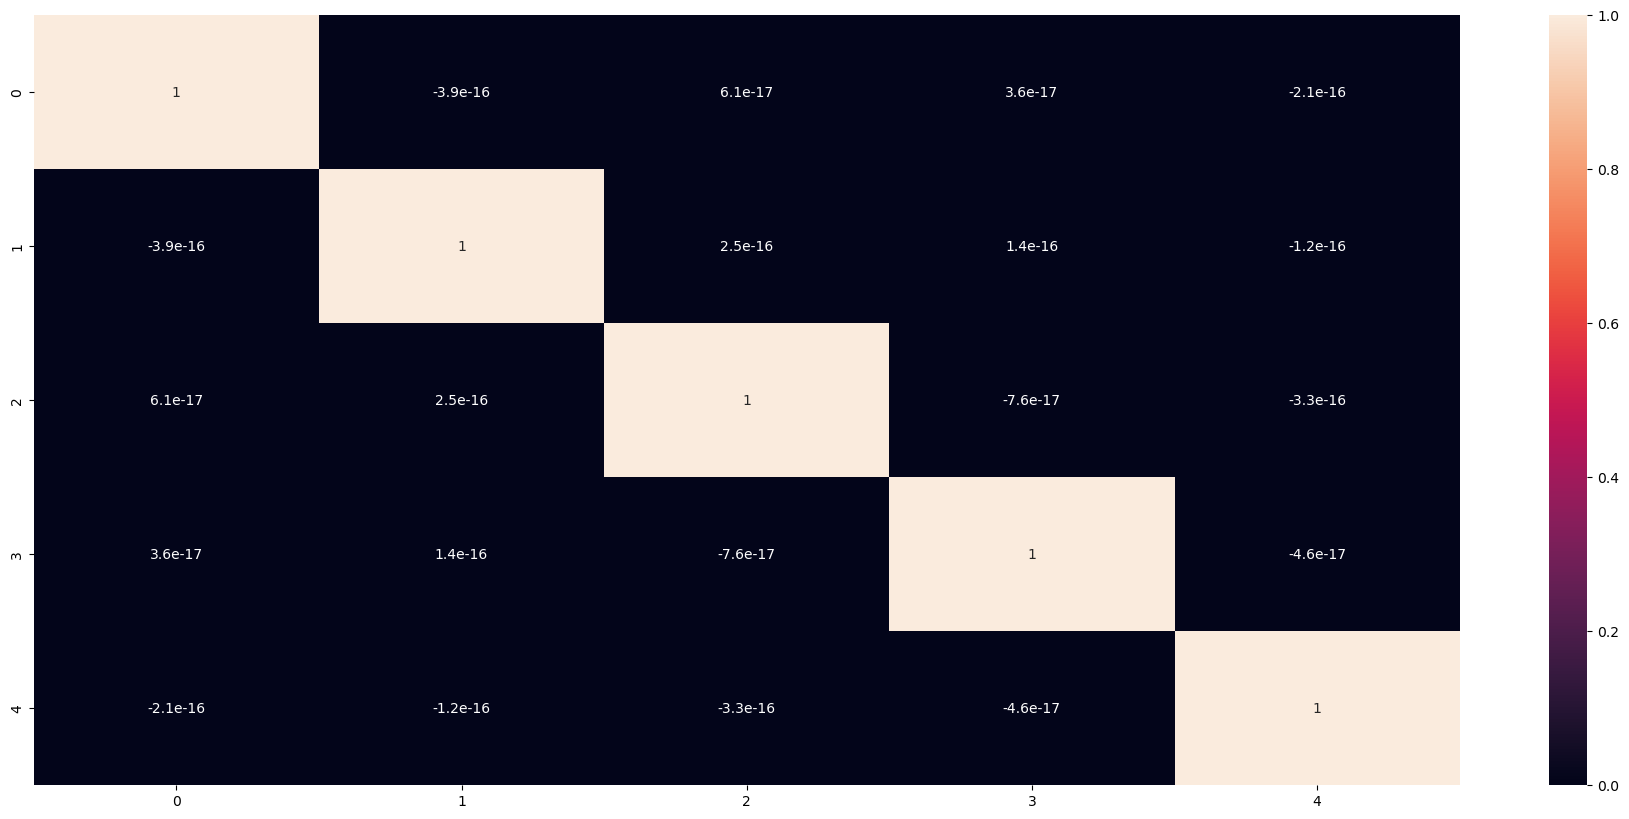

In [65]:
plt.figure(figsize = (23,10))
sns.heatmap(ind_var.corr(), annot = True)
plt.show()

In [66]:
 # Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif_factors(X):
    vif=[variance_inflation_factor(ind_var.values,i) for i in range (len(ind_var.columns))]
    vif_factors=pd.DataFrame()
    vif_factors["column"]=ind_var.columns
    vif_factors["VIF"]=vif
    return vif_factors

In [67]:
vif_factors=get_vif_factors(ind_var)
vif_factors

,column,VIF
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0


In [68]:
from sklearn.linear_model import LinearRegression

# Create a LinearRegression model
model_3 = LinearRegression()

# Fit the model
model_3.fit(x2, y)

# Print the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 5.60458653  6.23706565 -3.36949052  3.97600201  2.73808656 -4.91130908]
Intercept: 308.0638556296592


In [69]:
y_pred = model_3.predict(x2)

In [70]:
y_pred

array([198.52688775, 223.01461668, 124.88969748, ..., 234.58707855,
       224.12719804, 239.09084839])

# Accuracy And Precision of the model

In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Assuming you have the actual and predicted values in 'y_actual' and 'y_pred'
# Calculate R-squared
r_squared = model_3.score(x2, y)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y, y_pred)

print("R-squared:", r_squared)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

R-squared: 0.8942929416287093
MSE: 282.6450581145096
RMSE: 16.812050978821993
MAE: 10.509180661347473
